# <center> What is a Feature ? <br><br> Analysing the Distribution of Various Repository Attributes for 'Feature Label Repositories' ?</center>

### Importing Required Libraries

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Importing Appropriate DataSet

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

#pd.reset_option('max_columns')
pd.reset_option('max_colwidth')
pd.reset_option('max_rows')

df = pd.read_csv('../../dataset/repositories/filtered/filtered_feature_label_dataset.csv')

# Converting strings to actual python lists
df['labels'] = df['labels'].apply(ast.literal_eval)
df['feature_labels'] = df['feature_labels'].apply(ast.literal_eval)
df['topics'] = df['topics'].apply(ast.literal_eval)

print('Full Shape:', df.shape)
df.head(2)

Full Shape: (7899, 34)


,id,name,isFork,commits,branches,defaultBranch,releases,contributors,license,watchers,stargazers,forks,size,createdAt,pushedAt,updatedAt,homepage,mainLanguage,totalIssues,openIssues,totalPullRequests,openPullRequests,blankLines,codeLines,commentLines,metrics,lastCommit,lastCommitSHA,hasWiki,isArchived,languages,labels,topics,feature_labels
0,3258141,alibaba/vlayout,False,366.0,12.0,master,34.0,17.0,MIT License,341.0,10795,1818,1726,2017-02-27 08:11:47,2021-07-14 04:40:34,2021-07-14 04:40:58,http://tangram.pingguohe.net/,Java,503.0,190.0,23.0,5.0,3672,14074,4262,"[{'blankLines': 3101, 'language': 'Java', 'com...",2021-07-14T04:40:34,00d6be0a1fa89c2f54ca923d2ea2e34d279d289e,NaN,NaN,{'Java': 669506},"[bug, duplicate, enhancement, feature, help wa...",[],[feature]
1,3258277,goxr3plus/java-stream-player,False,181.0,4.0,master,11.0,6.0,GNU General Public License v3.0,9.0,123,29,5664,2017-10-23 02:33:38,2023-02-07 12:28:27,2023-01-24 04:00:42,NaN,Java,43.0,23.0,34.0,7.0,922,2533,1524,"[{'blankLines': 1, 'language': 'YAML', 'commen...",2023-02-07T12:28:27,09ddefe497a894dc9462d330792a9f09f69e2c77,NaN,NaN,{'Java': 130948},"[bug, dependencies, duplicate, enhancement, fe...",[],[feature request]


In [3]:
df.describe()

,id,commits,branches,releases,contributors,watchers,stargazers,forks,size,totalIssues,openIssues,totalPullRequests,openPullRequests,blankLines,codeLines,commentLines,hasWiki,isArchived
count,7.899000e+03,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7899.000000,7.899000e+03,7899.000000,7899.000000,7899.000000,7899.000000,7.899000e+03,7.899000e+03,7.899000e+03,0.0,0.0
mean,2.663624e+07,2245.139132,34.122800,48.706419,50.498671,50.840739,2071.021648,321.976833,7.565628e+04,535.415875,94.016838,751.892645,12.973414,2.065771e+04,1.883669e+05,2.778270e+04,NaN,NaN
std,3.019270e+07,7352.986689,108.422671,101.970801,74.809144,158.995565,6802.241001,1229.265646,3.085476e+05,1575.902162,393.775727,1732.294533,34.804647,8.282623e+04,7.748053e+05,1.596777e+05,NaN,NaN
min,3.258141e+06,101.000000,1.000000,0.000000,6.000000,0.000000,101.000000,0.000000,8.100000e+01,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,NaN,NaN
25%,3.988670e+06,385.000000,4.000000,5.000000,13.000000,12.000000,214.000000,46.000000,3.267000e+03,82.000000,11.000000,87.500000,1.000000,1.304000e+03,1.074450e+04,5.675000e+02,NaN,NaN
50%,7.558349e+06,826.000000,10.000000,21.000000,24.000000,23.000000,496.000000,97.000000,1.309300e+04,187.000000,30.000000,243.000000,5.000000,3.985000e+03,3.263700e+04,2.661000e+03,NaN,NaN
75%,5.398581e+07,1976.000000,26.000000,51.000000,52.000000,46.000000,1561.000000,243.000000,5.124350e+04,477.500000,81.000000,725.500000,13.000000,1.254700e+04,1.030705e+05,1.089200e+04,NaN,NaN
max,9.458913e+07,443276.000000,4408.000000,1032.000000,1736.000000,6846.000000,250837.000000,46343.000000,1.185815e+07,64364.000000,26287.000000,46962.000000,1556.000000,2.341225e+06,2.499625e+07,7.924667e+06,NaN,NaN


### Analysing Stargazers

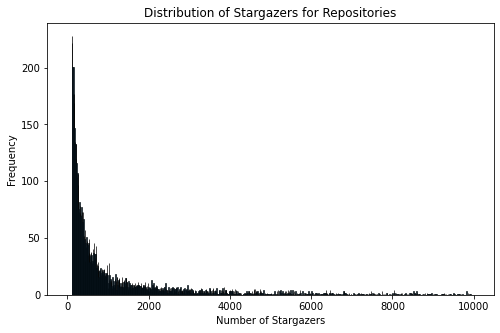

In [17]:
plt.figure(figsize=(8, 5))
plt.hist(df['stargazers'], bins=range(0, 10000, 10), edgecolor='black', alpha=0.7)
plt.title('Distribution of Stargazers for Repositories')
plt.xlabel('Number of Stargazers')
plt.ylabel('Frequency')

plt.show()

In [5]:
threshold = 300

under_threshold_stars_count = (df['stargazers'] < threshold).sum()
over_threshold_stars_count = (df['stargazers'] > threshold).sum()

print(f"Count of repositories with under {threshold} stars is {under_threshold_stars_count} representing {((under_threshold_stars_count/df.shape[0])*100):.2f}% of the total number of repositories")
print(f"Count of repositories with under {threshold} stars is {over_threshold_stars_count} representing {((over_threshold_stars_count/df.shape[0])*100):.2f}% of the total number of repositories")

Count of repositories with under 300 stars is 2804 representing 35.50% of the total number of repositories
Count of repositories with under 300 stars is 5088 representing 64.41% of the total number of repositories


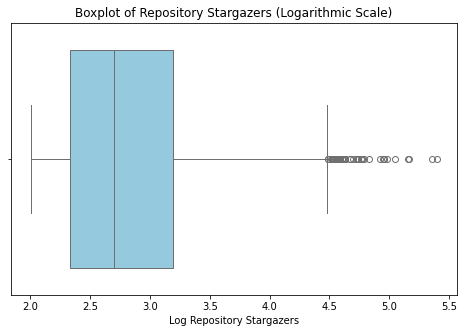

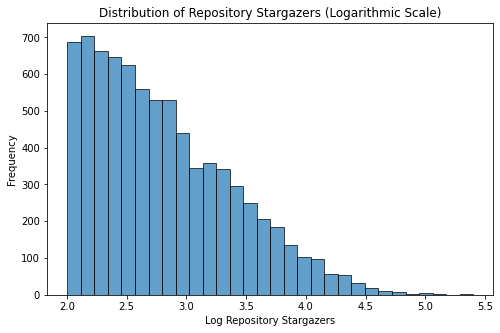

In [6]:
df['log_stargazers'] = df['stargazers'].apply(lambda x: max(1, x))  # Avoid log(0)
df['log_stargazers'] = df['log_stargazers'].apply(lambda x: np.log10(x))

# Boxplot with logarithmic scale
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['log_stargazers'], color='skyblue')
plt.title('Boxplot of Repository Stargazers (Logarithmic Scale)')
plt.xlabel('Log Repository Stargazers')

plt.show()

# Histogram with logarithmic scale
plt.figure(figsize=(8, 5))
plt.hist(df['log_stargazers'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Repository Stargazers (Logarithmic Scale)')
plt.xlabel('Log Repository Stargazers')
plt.ylabel('Frequency')

plt.show()

### Choosing Appropriate Threasholds for Filtering

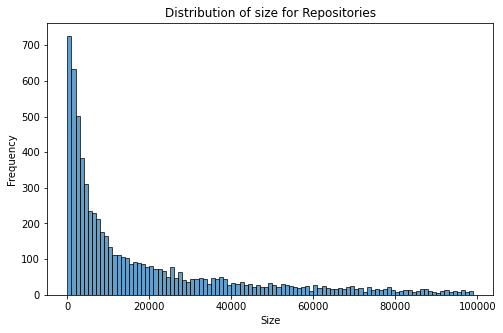

In [15]:
plt.figure(figsize=(8, 5))
plt.hist(df['size'], bins=range(0, 100000, 1000), edgecolor='black', alpha=0.7)
plt.title('Distribution of size for Repositories')
plt.xlabel('Size')
plt.ylabel('Frequency')

plt.show()

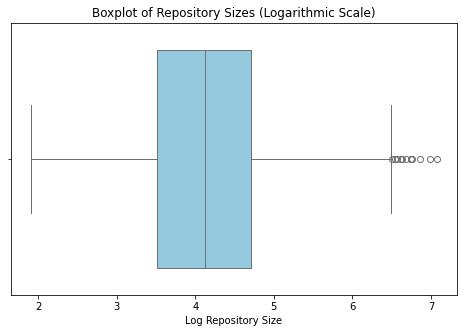

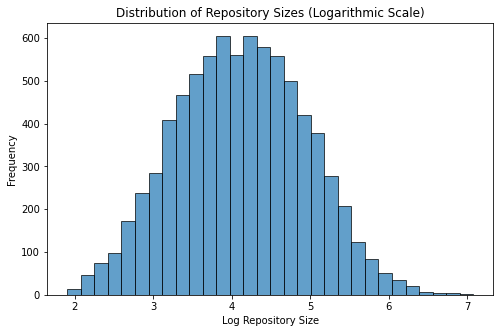

In [8]:
df['log_size'] = df['size'].apply(lambda x: max(1, x))  # Avoid log(0)
df['log_size'] = df['log_size'].apply(lambda x: np.log10(x))

# Boxplot with logarithmic scale
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['log_size'], color='skyblue')
plt.title('Boxplot of Repository Sizes (Logarithmic Scale)')
plt.xlabel('Log Repository Size')

plt.show()

# Histogram with logarithmic scale
plt.figure(figsize=(8, 5))
plt.hist(df['log_size'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Repository Sizes (Logarithmic Scale)')
plt.xlabel('Log Repository Size')
plt.ylabel('Frequency')

plt.show()